# Credit Card Kaggle Anamoly Detection

# Context

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

# Content

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

The dataset is collected from https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Inspection

In [4]:
# Checking shape of the dataset
df.shape

(284807, 31)

In [5]:
# Checking columns name of dataset
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
# Basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# Basic description of Dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Handling Duplicate Values

In [8]:
# Checking for number of duplicated values
count_duplicated = df.duplicated().sum()
print(f'Dataset has {count_duplicated} duplicated values')

Dataset has 1081 duplicated values


As it has only few duplicate value so we can delete it

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
#Now checking duplicate value again
count_duplicated = df.duplicated().sum()
print(f'Dataset has {count_duplicated} duplicated values')

Dataset has 0 duplicated values


# Handling Null values

In [11]:
# Checking for number of null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
# Basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

In [13]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


# Feature Engineering

In [14]:
## Get the Fraud and the normal dataset 

fraud = df[df['Class']==1]

normal = df[df['Class']==0]

# Exploratory data analysis

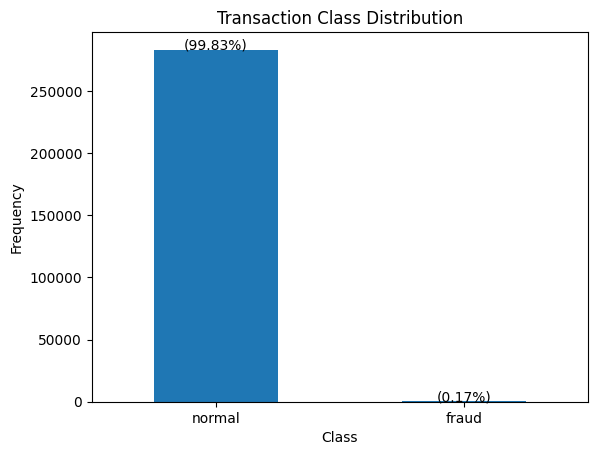

In [15]:
#Counting normal and fraud transaction
count_classes = pd.value_counts(df['Class'], sort=True)

# Calculating percentage frequencies
percentages = count_classes / count_classes.sum() * 100

# Plotting the distribution as a bar plot
ax = count_classes.plot(kind='bar', rot=0)

# Adding title and labels to the plot
plt.title("Transaction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")

# Adjusting x-axis ticks and labels
plt.xticks(range(2), ['normal','fraud'])

# Annotating bars with frequency and percentage
for i, v in enumerate(count_classes):
    ax.text(i, v + 0.5, f'({percentages[i]:.2f}%)', color='black', ha='center')

# Displaying the plot
plt.show()

In [16]:
print(fraud.shape,normal.shape)

(473, 31) (283253, 31)


As we can see it has two types of transaction, featuring 473 (0.17%)frauds and 283,253(99.83%) norma transactions out of 283,726 transactions. Notably, the dataset is highly unbalanced.

In [17]:
# We need to analyze more amount of information from the transaction data
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [18]:
normal.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

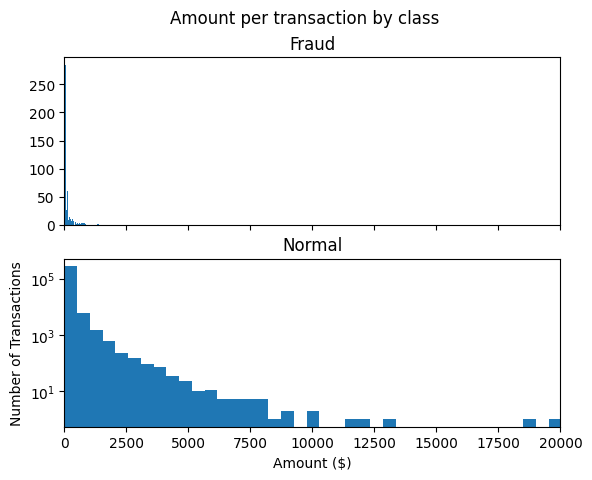

In [19]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50

ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

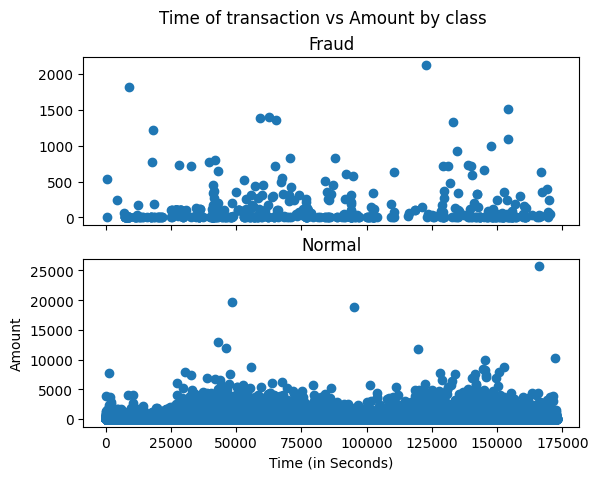

In [20]:
# We Will check Do fraudulent transactions occur more often during certain time frame ? Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

We can see it has no or very little dependency of time frame

# Checking multicollinearity in independant variables

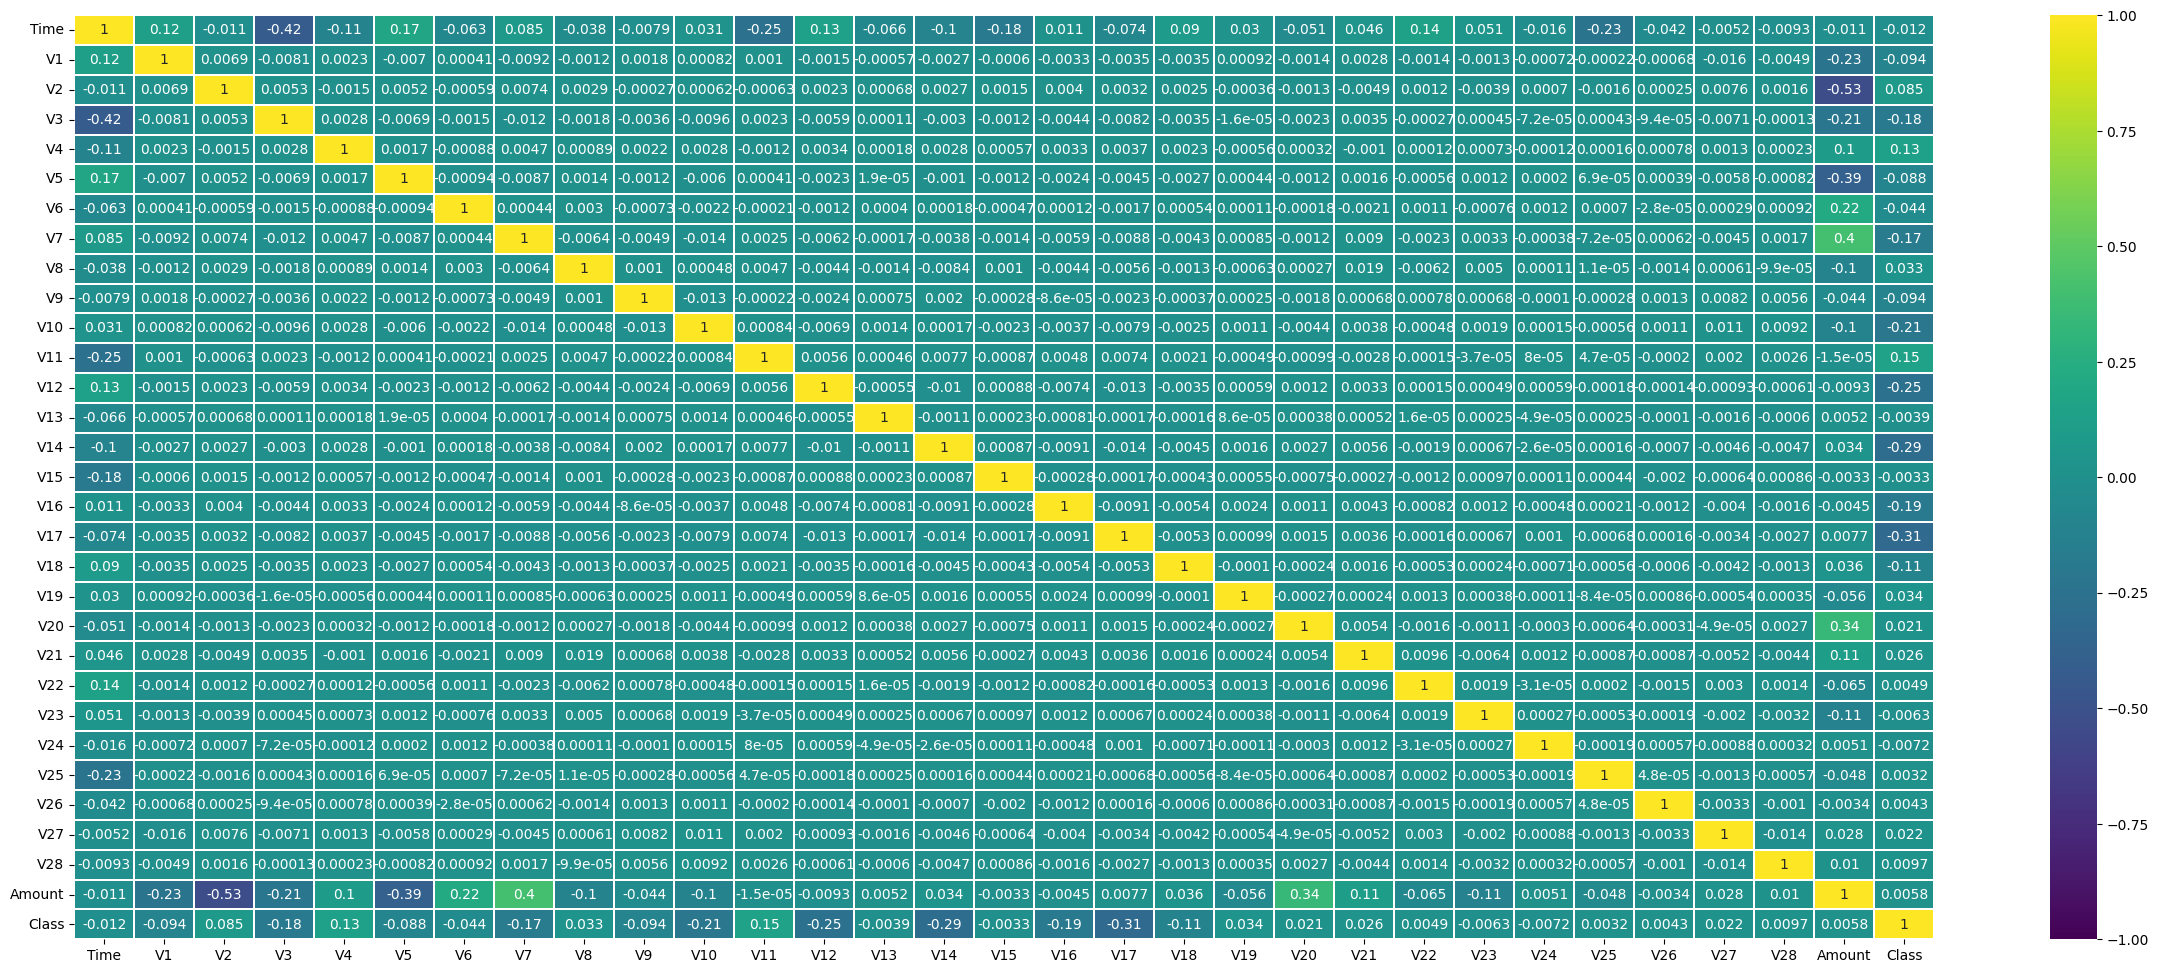

In [21]:
# Plotting a correlation heatmap for the dataset
plt.figure(figsize=(30,12))
correlation=df.corr()
sns.heatmap(correlation, vmin=-1, cmap='viridis',linewidth=0.2,annot=True)
plt.show()

# ML Model Implementation

In this project we will use Pycaret instead of scikit-learn .PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that speeds up the experiment cycle exponentially and makes you more productive.

You can find more about pycaret on https://pycaret.org/

In [ ]:
from pycaret.classification import *
m1=setup(data=df ,target='Class' )

In [26]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9996,0.9423,0.7765,0.9596,0.8555,0.8553,0.8615,14.5780
xgboost,Extreme Gradient Boosting,0.9996,0.9742,0.7883,0.9538,0.8597,0.8595,0.8651,2.7640
rf,Random Forest Classifier,0.9995,0.9438,0.7704,0.9496,0.8462,0.8460,0.8528,203.8980
lda,Linear Discriminant Analysis,0.9994,0.8970,0.7673,0.8588,0.8065,0.8062,0.8095,1.5340
dt,Decision Tree Classifier,0.9992,0.8700,0.7405,0.7691,0.7502,0.7498,0.7521,7.0540
ada,Ada Boost Classifier,0.9992,0.9697,0.6919,0.7998,0.7383,0.7379,0.7417,34.8080
lr,Logistic Regression,0.9991,0.9459,0.6079,0.8235,0.6914,0.6910,0.7029,4.0080
gbc,Gradient Boosting Classifier,0.9990,0.6779,0.4950,0.7867,0.5889,0.5885,0.6125,193.7320
ridge,Ridge Classifier,0.9989,0.0000,0.3931,0.8325,0.5260,0.5255,0.5666,0.1870
knn,K Neighbors Classifier,0.9984,0.5680,0.0182,0.4000,0.0346,0.0346,0.0840,22.3090


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=555, verbose=0, warm_start=False)

In [27]:
qda=create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9729,0.9606,0.9091,0.0531,0.1003,0.0975,0.2161
1,0.9759,0.9840,0.8182,0.0541,0.1015,0.0987,0.2067
2,0.9736,0.9950,1.0000,0.0591,0.1117,0.1089,0.2399
3,0.9721,0.9535,0.9091,0.0515,0.0976,0.0947,0.2128
4,0.9737,0.8869,0.6970,0.0429,0.0808,0.0780,0.1687
5,0.9751,0.9895,0.8788,0.0559,0.1051,0.1023,0.2181
6,0.9732,0.9886,0.9394,0.0552,0.1042,0.1014,0.2242
7,0.9737,0.9755,0.8824,0.0547,0.1031,0.1002,0.2161
8,0.9741,0.9765,0.7576,0.0470,0.0885,0.0856,0.1847


In [28]:
qda

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [30]:
xgboost=create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9996,0.9966,0.8182,0.9643,0.8852,0.8851,0.8881
1,0.9996,0.9603,0.7879,1.0000,0.8814,0.8812,0.8875
2,0.9997,0.9999,0.8788,0.9667,0.9206,0.9205,0.9216
3,0.9997,0.9784,0.8485,0.9655,0.9032,0.9031,0.9050
4,0.9993,0.9109,0.6061,1.0000,0.7547,0.7544,0.7782
5,0.9993,0.9939,0.6364,0.9130,0.7500,0.7497,0.7619
6,0.9997,0.9951,0.8788,0.9667,0.9206,0.9205,0.9216
7,0.9996,0.9680,0.8529,0.9355,0.8923,0.8921,0.8931
8,0.9994,0.9521,0.7273,0.9231,0.8136,0.8133,0.8191


In [31]:
xgboost

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='binary:logistic', ...)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9996,0.9532,0.8182,0.9643,0.8852,0.8851,0.8881
1,0.9995,0.9525,0.7879,0.8966,0.8387,0.8385,0.8402
2,0.9996,0.9836,0.7576,1.0000,0.8621,0.8619,0.8702
3,0.9994,0.9069,0.7273,0.9231,0.8136,0.8133,0.8191
4,0.9995,0.9378,0.7879,0.8966,0.8387,0.8385,0.8402
5,0.9996,0.9687,0.8485,0.9333,0.8889,0.8887,0.8897
6,0.9995,0.9688,0.7576,0.9615,0.8475,0.8472,0.8533
7,0.9994,0.9095,0.6471,1.0000,0.7857,0.7854,0.8042
8,0.9994,0.9522,0.6970,0.9583,0.8070,0.8067,0.8170


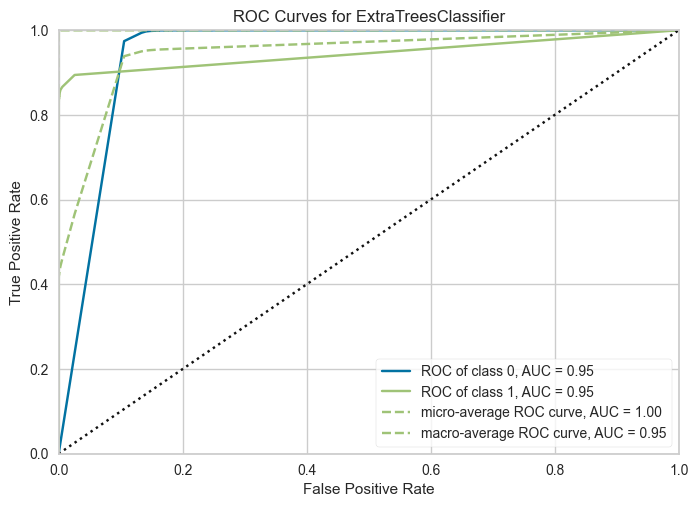

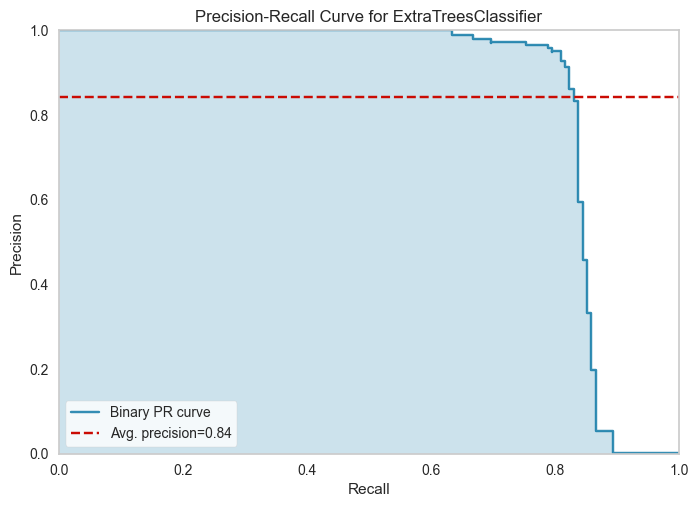

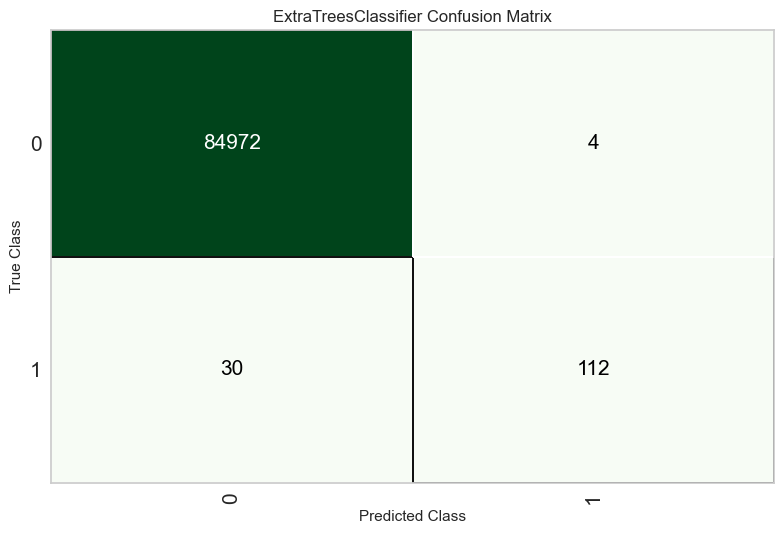

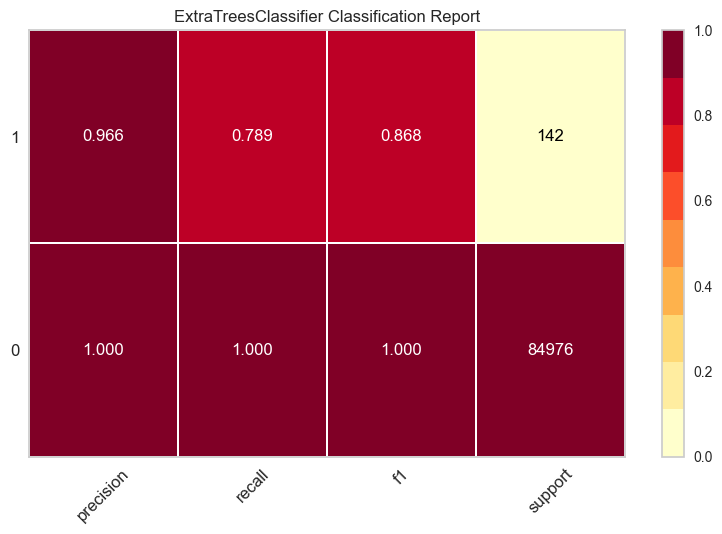

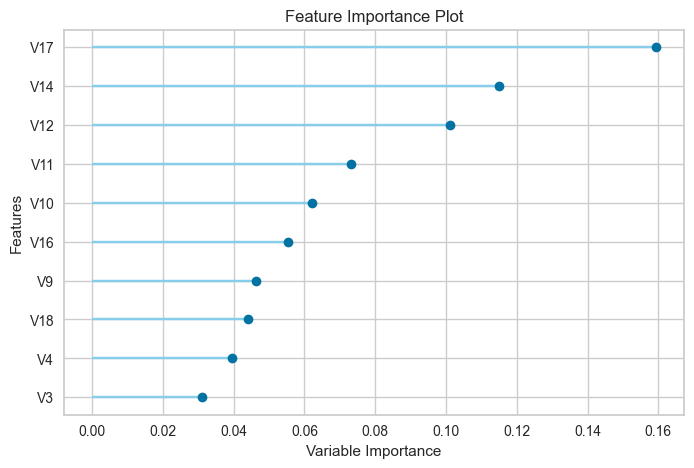

In [36]:
et=create_model('et')
plot_model(et, plot = 'auc')
plot_model(et, plot = 'pr')
plot_model(et, plot = 'confusion_matrix')
plot_model(et, plot = 'class_report')
plot_model(et, plot = 'feature')

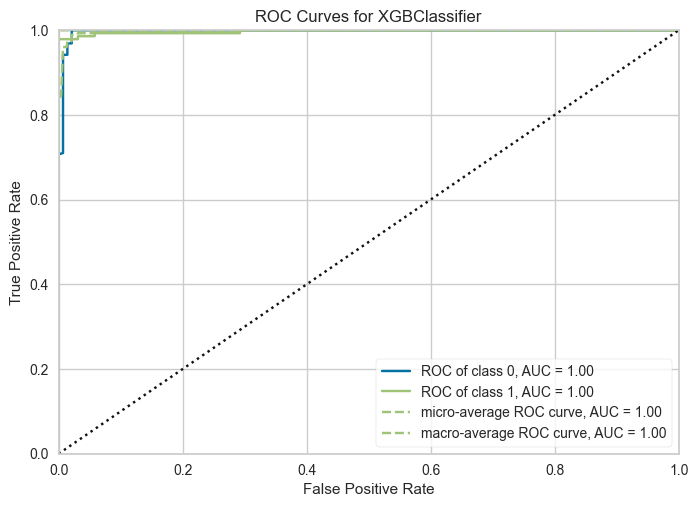

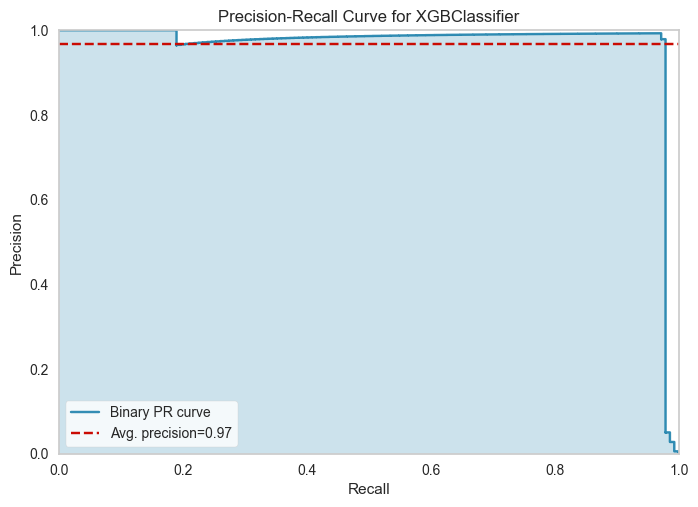

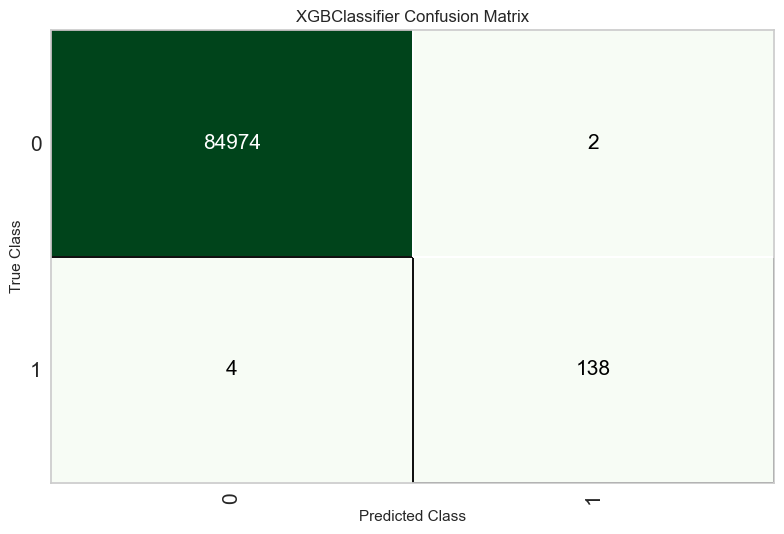

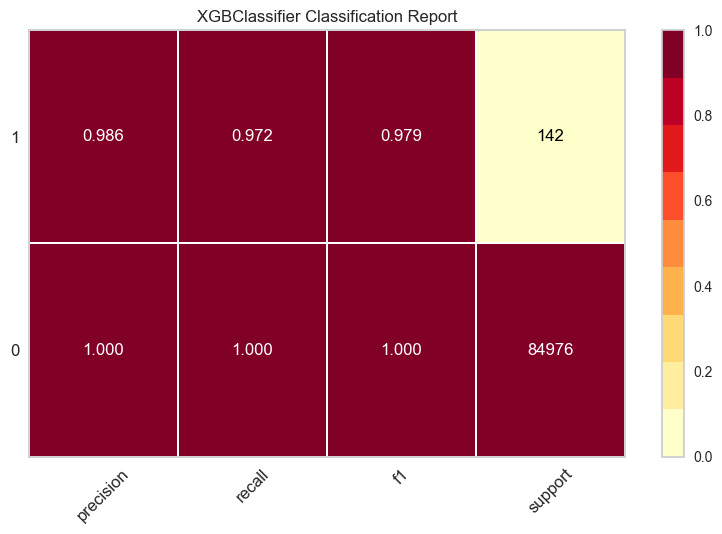

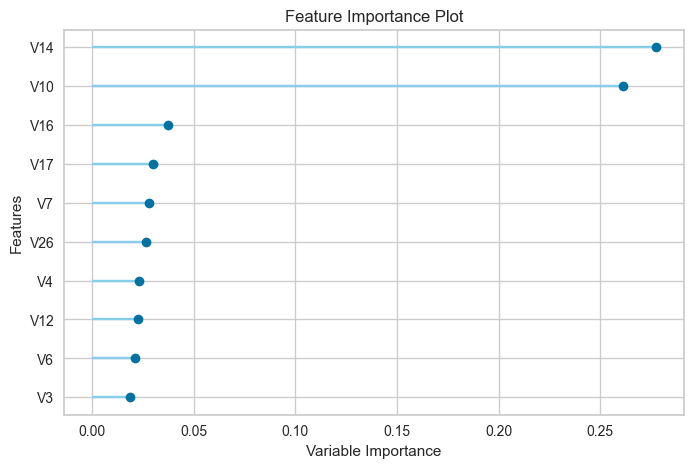

In [38]:
plot_model(xgboost, plot = 'auc')
plot_model(xgboost, plot = 'pr')
plot_model(xgboost, plot = 'confusion_matrix')
plot_model(xgboost, plot = 'class_report')
plot_model(xgboost, plot = 'feature')

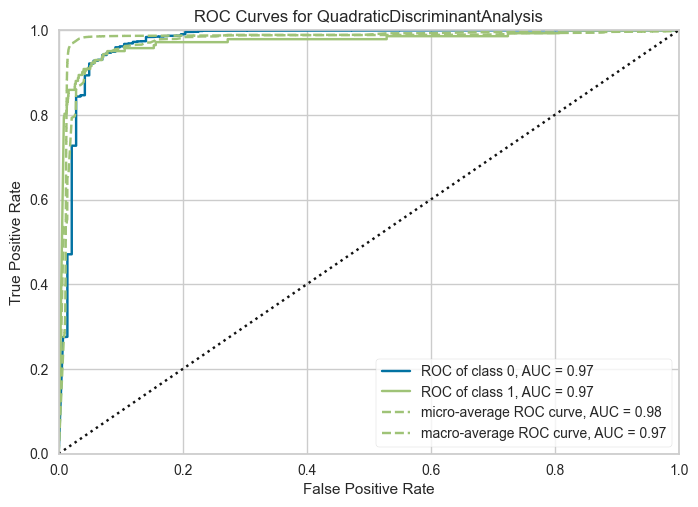

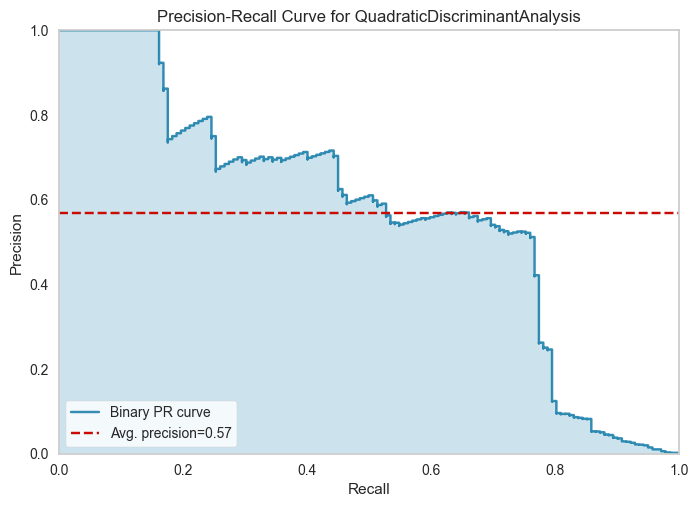

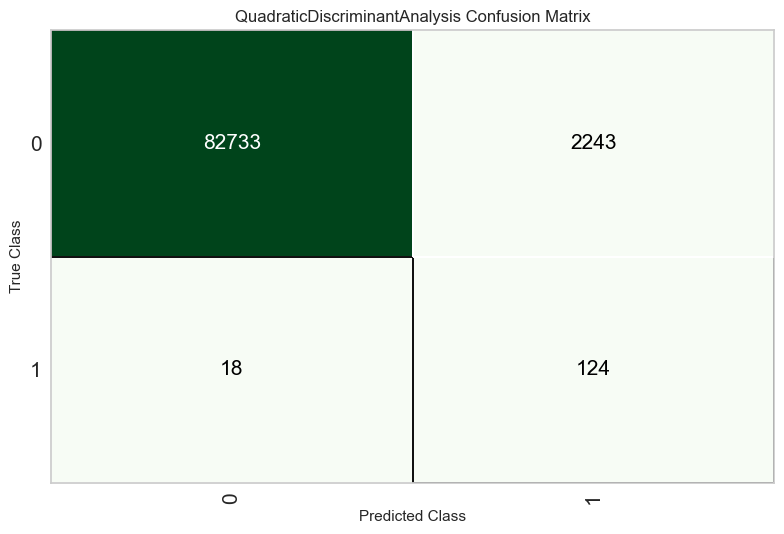

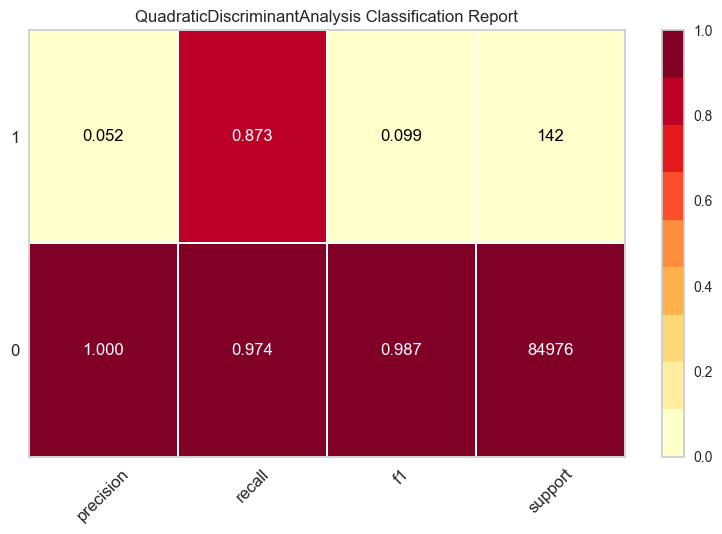

In [40]:
plot_model(qda, plot = 'auc')
plot_model(qda, plot = 'pr')
plot_model(qda, plot = 'confusion_matrix')
plot_model(qda, plot = 'class_report')

When should you prioritize recall?

For example, when testing patients for COVID-19 it is extremely important to capture as many positive cases as possible to understand the prevalence of the virus within a given area. It is very dangerous to misdiagnose someone as not having the virus when in fact they do because they can spread the disease to others without knowing. In the opposite case, if someone is healthy but diagnosed as having the virus the penalty is they will unnecessarily self-isolate for a few days. False negatives are much more harmful than false positives in this case so we have to prioritize recall.

When should you prioritize precision?

On the other hand, when Netflix is recommending content to its users it doesn’t matter if a series the user might like isn’t displayed on the list of suggestions. What is consequential is having a high rate of suggestions that the user has no interest in. The ratio of true positives to true positives and false negatives, or recall, isn’t very important. The recommender network drives value by consistently delivering suggestions the user will enjoy so precision is the priority in this scenario because every suggestion must be a correct prediction to maintain usability.


Credit card fraud is the unauthorized use of a credit or debit card to make purchases. Credit card companies have an obligation to protect their customers’ finances and they employ fraud detection models to identify unusual financial activity and freeze a user’s credit card if transaction activity is out of the ordinary for a given individual. The penalty for mislabeling a fraud transaction as legitimate is having a user’s money stolen, which the credit card company typically reimburses. On the other hand, the penalty for mislabeling a legitimate transaction as fraud is having the user frozen out of their finances and unable to make payments. There is a very fine tradeoff between these two consequences and we will discuss how to handle this when training a model.

In [43]:
#average cash gained if 1 more fraud is successfully flagged
avg_fraud_cost = round(np.mean(df.loc[df.Class==1].Amount.values), 1)

print(f'The average cost per uncaught fraudulent transaction is $ {avg_fraud_cost}')

The average cost per uncaught fraudulent transaction is $ 123.9


In [45]:
#average cash gained if 1 more normal transcation is successfully flagged
avg_fraud_cost = round(np.mean(df.loc[df.Class==0].Amount.values), 1)

print(f'The average cost per succesful transaction is $ {avg_fraud_cost}')

The average cost per succesful transaction is $ 88.4


At  $ 88.4 vs $ 123.9 per transaction, respectively, the cost ratio between type I and II errors is roughly [1:1.4].

In other words, reducing the false negative rate (catching a fraud transaction) is 1.4 times as important as reducing the false positive rate

So,we will give more importance to recall but consider precision as well.


So,QuadrictDiscrimantAnaysis(qda) does very well in recall but it performs poorly in other metrics such as precision,f1 score,etc...

# Isolation Forest Algorthim and Local Outlier Factor(LOF) Algorithm

This are other algorithms used for outlier detection and anomaly detection. While these algorithms are available in PyCaret as unsupervised models .You can check this on https://pycaret.readthedocs.io/en/stable/api/anomaly.html .Since we have labels, we will utilize them by importing from the scikit-learn library.

# Isolation Forest Algorithm 

One of the newest techniques to detect anomalies is called Isolation Forests. The algorithm is based on the fact that anomalies are data points that are few and different. As a result of these properties, anomalies are susceptible to a mechanism called isolation.

This method is highly useful and is fundamentally different from all existing methods. It introduces the use of isolation as a more effective and efficient means to detect anomalies than the commonly used basic distance and density measures. Moreover, this method is an algorithm with a low linear time complexity and a small memory requirement. It builds a good performing model with a small number of trees using small sub-samples of fixed size, regardless of the size of a data set.

How Isolation Forests Work The Isolation Forest algorithm isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The logic argument goes: isolating anomaly observations is easier because only a few conditions are needed to separate those cases from the normal observations. On the other hand, isolating normal observations require more conditions. Therefore, an anomaly score can be calculated as the number of conditions required to separate a given observation.

In [22]:
 #Creating the dataset with all dependent variables
dependent_variable = 'Class'

# Creating the dataset with all independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})

# Define a random state 
state = np.random.RandomState(42)

# Create the data of independent variables
x = df[independent_variables].values
# Create the data of dependent variable
y = df[dependent_variable].values

x_outliers = state.uniform(low=0, high=1, size=(x.shape[0], x.shape[1]))
# Print the shapes of X & Y
print(x.shape)
print(y.shape)

(283726, 30)
(283726,)


In [23]:
from sklearn.model_selection import train_test_split
#Creating train validation and test data
x_train,x_rem,y_train,y_rem=train_test_split(x,y, train_size=0.75,random_state=1)
x_valid,x_test,y_valid,y_test=train_test_split(x,y, test_size=0.40,random_state=1)

In [24]:
outlier_fraction = len(fraud)/float(len(normal))

In [25]:
from pycaret.anomaly import *
exp_name = setup(data = x_train)
iforest = create_model('iforest',fraction=outlier_fraction)
iforest_predictions = predict_model(model = iforest, data = x_valid)

,Description,Value
0,Session id,1447
1,Original data shape,"(212794, 30)"
2,Transformed data shape,"(212794, 30)"
3,Numeric features,30
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [7]:
plot_model(iforest)
# Due to storage limitations, the output of the plot model is not displayed in this Jupyter file.

In [ ]:
lof = create_model('lof',fraction=outlier_fraction)
lof_predictions = predict_model(model = lof, data = x_valid)

In [ ]:
plot_model(lof)
# Due to storage limitations, the output of the plot model is not displayed in this Jupyter file.

In [29]:
from sklearn.metrics import classification_report,accuracy_score
n_errors = (iforest_predictions['Anomaly'] != y_valid).sum()
# Run Classification Metrics
print("The total error in validation set of Iforest model is:",n_errors)
print("Accuracy Score :")
print(accuracy_score(y_valid,iforest_predictions['Anomaly']))
print("Classification Report :")
print(classification_report(y_valid,iforest_predictions['Anomaly']))

The total error in validation set of Iforest model is: 452
Accuracy Score :
0.997344846829383
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    169933
           1       0.23      0.22      0.22       302

    accuracy                           1.00    170235
   macro avg       0.62      0.61      0.61    170235
weighted avg       1.00      1.00      1.00    170235



In [33]:
n_errors = (lof_predictions['Anomaly'] != y_valid).sum()
# Run Classification Metrics
print("The total error in validation set of Lof model is:",n_errors)
print("Accuracy Score :")
print(accuracy_score(y_valid,lof_predictions['Anomaly']))
print("Classification Report :")
print(classification_report(y_valid,lof_predictions['Anomaly']))

The total error in validation set of Lof model is: 499
Accuracy Score :
0.9970687578935001
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    169933
           1       0.05      0.03      0.04       302

    accuracy                           1.00    170235
   macro avg       0.52      0.52      0.52    170235
weighted avg       1.00      1.00      1.00    170235



# Final evaluation on test dataset

In [32]:
iforest_final_predictions = predict_model(model = iforest, data = x_test)

In [35]:
from sklearn.metrics import classification_report,accuracy_score
n_errors = (iforest_final_predictions['Anomaly'] != y_test).sum()
# Run Classification Metrics
print("The total error in test set of Iforest model is:",n_errors)
print("Accuracy Score :")
print(accuracy_score(y_test,iforest_final_predictions['Anomaly']))
print("Classification Report :")
print(classification_report(y_test,iforest_final_predictions['Anomaly']))

The total error in test set of Iforest model is: 270
Accuracy Score :
0.9976209567278462
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113320
           1       0.22      0.22      0.22       171

    accuracy                           1.00    113491
   macro avg       0.61      0.61      0.61    113491
weighted avg       1.00      1.00      1.00    113491



# Observations :

Isolation Forest has a 99.76% more accurate than LOF of 99.73%.

But mainly when comparing error precision & recall for 2 models , the Isolation Forest performed much better than the LOF 

# Final Observation:

Overall the XGBoost perfomed very well followed ExtraTreesClassifier which is mch better than outlier detection method Lof and Iforest